# index-day-changes-v1-0

Get prices from api for an index.
Analyse day changes

In [6]:
import pandas as pd
import requests, json, datetime, calendar
from datetime import timedelta
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Using fix_yahoo_finance

In [2]:
from pandas_datareader import data as pdr

import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)

### Testing

In [4]:
# Test on one ticker
data_fix1 = pdr.get_data_yahoo("^FTSE", start="2016-01-01", end="2018-08-10")

data_fix1.shape
data_fix1.sort_index(ascending=False).head()

[*********************100%***********************]  1 of 1 downloaded


(660, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-10,7741.799805,7741.799805,7657.700195,7667.000000,7667.000000,664153400
2018-08-09,7776.700195,7776.799805,7714.500000,7741.799805,7741.799805,565689200
2018-08-08,7718.500000,7790.200195,7707.299805,7776.700195,7776.700195,604063500
2018-08-07,7663.799805,7752.100098,7663.200195,7718.500000,7718.500000,675716300
2018-08-06,7659.100098,7681.899902,7636.600098,7663.799805,7663.799805,813731500


In [8]:
# Calc measures
measures = data_fix1.copy()


measures['ratio_close_open'] = round(data_fix1['Close'] / data_fix1['Open'], 3)
measures['ratio_high_low'] = round(data_fix1['High'] / data_fix1['Low'], 3)
measures['ratio_high_open'] = round(data_fix1['High'] / data_fix1['Open'], 3)
measures['ratio_high_close'] = round(data_fix1['High'] / data_fix1['Close'], 3)

measures.shape
measures.head()

(660, 10)

,Open,High,Low,Close,Adj Close,Volume,ratio_close_open,ratio_high_low,ratio_high_open,ratio_high_close
Date,,,,,,,,,,
2016-01-04,6242.299805,6242.299805,6071.000000,6093.399902,6093.399902,686232700,0.976,1.028,1.000,1.024
2016-01-05,6093.399902,6166.299805,6079.200195,6137.200195,6137.200195,624070800,1.007,1.014,1.012,1.005
2016-01-06,6137.200195,6137.200195,6018.700195,6073.399902,6073.399902,699957700,0.990,1.020,1.000,1.011
2016-01-07,6073.399902,6073.399902,5888.000000,5954.100098,5954.100098,1054315500,0.980,1.031,1.000,1.020
2016-01-08,5954.100098,6013.399902,5912.399902,5912.399902,5912.399902,809964200,0.993,1.017,1.010,1.017


count    660.000000
mean       1.000348
std        0.008239
min        0.965000
25%        0.996000
50%        1.001000
75%        1.005000
max        1.036000
Name: ratio_close_open, dtype: float64

51

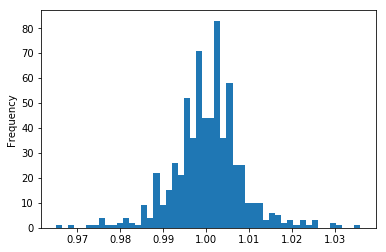

In [22]:
# Plot distribution of change - Close / Open

measures['ratio_close_open'].plot(bins=50, kind='hist')

measures['ratio_close_open'].describe()

measures['ratio_close_open'].loc[measures['ratio_close_open'] > 1.01].count()

count    660.000000
mean       1.005327
std        0.005584
min        1.000000
25%        1.001000
50%        1.004000
75%        1.008000
max        1.036000
Name: ratio_high_open, dtype: float64

246

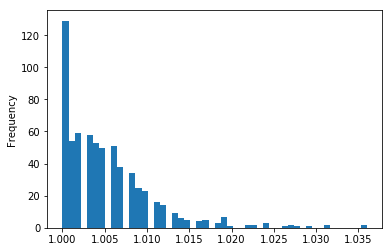

In [24]:
# Plot distribution of change - High  / Open

measures['ratio_high_open'].plot(bins=50, kind='hist')

measures['ratio_high_open'].describe()

measures['ratio_high_open'].loc[measures['ratio_high_low'] > 1.01].count()

### Get timing of high, and price 1 hour in - *** n.b. need new api call to get this. ***

Using Alpha Vantage (GT1KDUFZXSPFXUO7, saved CSV output from api call:
https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=^FTSE&interval=15min&apikey=<<apikeyhere>>&outputsize=full&datatype=csv

In [108]:
# Load data from csv
interval_15min_df = pd.read_csv('intraday_15min_^FTSE.csv', parse_dates=['timestamp'])

interval_15min_df.rename(columns={"timestamp": "timestamp-us-eastern"}, inplace=True)

interval_15min_df.shape
interval_15min_df.dtypes
interval_15min_df.head(10)

(1014, 6)

timestamp-us-eastern    datetime64[ns]
open                           float64
high                           float64
low                            float64
close                          float64
volume                           int64
dtype: object

,timestamp-us-eastern,open,high,low,close,volume
0,2018-08-30 09:45:00,7514.0698,7515.8501,7512.3198,7515.1299,0
1,2018-08-30 09:30:00,7514.5400,7514.7900,7508.9702,7514.2002,0
2,2018-08-30 09:15:00,7511.2002,7516.5601,7510.7798,7514.7900,0
3,2018-08-30 09:00:00,7506.9502,7512.0898,7505.7202,7511.0000,0
4,2018-08-30 08:45:00,7517.4800,7517.4800,7506.7798,7506.7798,0
5,2018-08-30 08:30:00,7518.9800,7519.7700,7515.3501,7517.8198,0
6,2018-08-30 08:15:00,7517.9502,7519.8599,7517.1602,7518.7900,0
7,2018-08-30 08:00:00,7518.7998,7518.7998,7512.2100,7517.8301,0
8,2018-08-30 07:45:00,7524.5498,7524.5498,7518.2700,7518.8101,0
9,2018-08-30 07:30:00,7519.6499,7524.7798,7519.6499,7524.7798,0


In [109]:
# Convert datetime to GMT

interval_15min_df['timestamp-us-eastern'] = interval_15min_df['timestamp-us-eastern'].dt.tz_localize('US/Eastern')
interval_15min_df['timestamp-London'] = interval_15min_df['timestamp-us-eastern'].dt.tz_convert('Europe/London')

interval_15min_df.head(10)

,timestamp-us-eastern,open,high,low,close,volume,timestamp-London
0,2018-08-30 09:45:00-04:00,7514.0698,7515.8501,7512.3198,7515.1299,0,2018-08-30 14:45:00+01:00
1,2018-08-30 09:30:00-04:00,7514.5400,7514.7900,7508.9702,7514.2002,0,2018-08-30 14:30:00+01:00
2,2018-08-30 09:15:00-04:00,7511.2002,7516.5601,7510.7798,7514.7900,0,2018-08-30 14:15:00+01:00
3,2018-08-30 09:00:00-04:00,7506.9502,7512.0898,7505.7202,7511.0000,0,2018-08-30 14:00:00+01:00
4,2018-08-30 08:45:00-04:00,7517.4800,7517.4800,7506.7798,7506.7798,0,2018-08-30 13:45:00+01:00
5,2018-08-30 08:30:00-04:00,7518.9800,7519.7700,7515.3501,7517.8198,0,2018-08-30 13:30:00+01:00
6,2018-08-30 08:15:00-04:00,7517.9502,7519.8599,7517.1602,7518.7900,0,2018-08-30 13:15:00+01:00
7,2018-08-30 08:00:00-04:00,7518.7998,7518.7998,7512.2100,7517.8301,0,2018-08-30 13:00:00+01:00
8,2018-08-30 07:45:00-04:00,7524.5498,7524.5498,7518.2700,7518.8101,0,2018-08-30 12:45:00+01:00
9,2018-08-30 07:30:00-04:00,7519.6499,7524.7798,7519.6499,7524.7798,0,2018-08-30 12:30:00+01:00


In [182]:
# Split out date and time

interval_15min_df['Date'] = [d.date() for d in interval_15min_df['timestamp-London']]
interval_15min_df['Time'] = [d.time() for d in interval_15min_df['timestamp-London']]
interval_15min_trimmed.dtypes

# Remove latest date as it is incomplete
interval_15min_trimmed = interval_15min_df[(pd.to_datetime(interval_15min_df['Date']) < '2018-08-30')]

interval_15min_trimmed.shape
interval_15min_trimmed.head(10)

timestamp-us-eastern       datetime64[ns, US/Eastern]
open                                          float64
high                                          float64
low                                           float64
close                                         float64
volume                                          int64
timestamp-London        datetime64[ns, Europe/London]
Date                                           object
Time                                           object
Time Inc Counter                              float64
Date String                                    object
Time String                                    object
dtype: object

(986, 9)

,timestamp-us-eastern,open,high,low,close,volume,timestamp-London,Date,Time
28,2018-08-29 11:15:00-04:00,7570.0098,7573.3198,7559.5200,7564.3501,0,2018-08-29 16:15:00+01:00,2018-08-29,16:15:00
29,2018-08-29 11:00:00-04:00,7558.3701,7569.8301,7558.2100,7569.8301,0,2018-08-29 16:00:00+01:00,2018-08-29,16:00:00
30,2018-08-29 10:45:00-04:00,7548.0801,7559.6699,7546.2300,7559.0200,0,2018-08-29 15:45:00+01:00,2018-08-29,15:45:00
31,2018-08-29 10:30:00-04:00,7553.1802,7558.7002,7547.7798,7548.5498,0,2018-08-29 15:30:00+01:00,2018-08-29,15:30:00
32,2018-08-29 10:15:00-04:00,7559.5601,7559.7100,7545.0898,7551.0298,0,2018-08-29 15:15:00+01:00,2018-08-29,15:15:00
33,2018-08-29 10:00:00-04:00,7561.6299,7570.9600,7557.2798,7559.2300,0,2018-08-29 15:00:00+01:00,2018-08-29,15:00:00
34,2018-08-29 09:45:00-04:00,7593.6299,7597.0098,7560.4502,7561.7598,0,2018-08-29 14:45:00+01:00,2018-08-29,14:45:00
35,2018-08-29 09:30:00-04:00,7593.9800,7595.0098,7590.7300,7593.2798,0,2018-08-29 14:30:00+01:00,2018-08-29,14:30:00
36,2018-08-29 09:15:00-04:00,7595.6401,7596.5498,7592.0298,7593.8901,0,2018-08-29 14:15:00+01:00,2018-08-29,14:15:00
37,2018-08-29 09:00:00-04:00,7594.0000,7599.9199,7593.7100,7595.6899,0,2018-08-29 14:00:00+01:00,2018-08-29,14:00:00


In [183]:
# Summary stats

interval_15min_trimmed.describe()

print("Max Date = ", interval_15min_trimmed['Date'].max() )
print("Min Date = ", interval_15min_trimmed['Date'].min() )
print("Max Time = ", interval_15min_trimmed['Time'].max() )
print("Min Time = ", interval_15min_trimmed['Time'].min() )

,open,high,low,close,volume
count,986.000000,986.000000,986.000000,986.000000,986.0
mean,7642.485196,7647.076011,7630.212914,7642.429003,0.0
std,63.997017,64.043780,251.512076,64.068718,0.0
min,7479.160200,7490.100100,0.000000,7479.669900,0.0
25%,7586.857325,7590.830100,7581.394900,7586.482400,0.0
50%,7648.774900,7653.100100,7645.119900,7648.850100,0.0
75%,7691.140150,7695.187600,7686.310075,7691.019900,0.0
max,7785.149900,7790.080100,7782.399900,7784.730000,0.0


Max Date =  2018-08-29
Min Date =  2018-07-19
Max Time =  16:15:00
Min Time =  08:00:00


In [184]:
# Count number of time records per day
count_times_per_day = interval_15min_trimmed[['Date', 'Time']].groupby('Date').count()

count_times_per_day.describe()

,Time
count,29.0
mean,34.0
std,0.0
min,34.0
25%,34.0
50%,34.0
75%,34.0
max,34.0


In [190]:
# List all possible time value

interval_15min_trimmed['Time'].unique()

# Set up dicitonary for times to incremental counter
dict_time_inc_counter = {'08:00:00':1, '08:15:00':2, '08:30:00':3, '08:45:00':4, \
                         '09:00:00':5, '09:15:00':6, '09:30:00':7, '09:45:00':8, \
                         '10:00:00':9, '10:15:00':10, '10:30:00':11, '10:45:00':12, \
                         '11:00:00':13, '11:15:00':14, '11:30:00':15, '11:45:00':16, \
                         '12:00:00':17, '12:15:00':18, '12:30:00':19, '12:45:00':20, \
                         '13:00:00':21, '13:15:00':22, '13:30:00':23, '13:45:00':24, \
                         '14:00:00':25, '14:15:00':26, '14:30:00':27, '14:45:00':28, \
                         '15:00:00':29, '15:15:00':30, '15:30:00':31, '15:45:00':32, \
                         '16:00:00':33, '16:15:00':34 }

array([datetime.time(16, 15), datetime.time(16, 0), datetime.time(15, 45),
       datetime.time(15, 30), datetime.time(15, 15), datetime.time(15, 0),
       datetime.time(14, 45), datetime.time(14, 30), datetime.time(14, 15),
       datetime.time(14, 0), datetime.time(13, 45), datetime.time(13, 30),
       datetime.time(13, 15), datetime.time(13, 0), datetime.time(12, 45),
       datetime.time(12, 30), datetime.time(12, 15), datetime.time(12, 0),
       datetime.time(11, 45), datetime.time(11, 30), datetime.time(11, 15),
       datetime.time(11, 0), datetime.time(10, 45), datetime.time(10, 30),
       datetime.time(10, 15), datetime.time(10, 0), datetime.time(9, 45),
       datetime.time(9, 30), datetime.time(9, 15), datetime.time(9, 0),
       datetime.time(8, 45), datetime.time(8, 30), datetime.time(8, 15),
       datetime.time(8, 0)], dtype=object)

In [191]:
# Apply dictionary to dataframe

#interval_15min_trimmed['Time String'] = pd.to_datetime(interval_15min_trimmed['Time']).dt.strftime('%M-%S')
#interval_15min_trimmed['Time String'] = pd.to_datetime(interval_15min_trimmed['Time'], format= '%H:%M:%S').astype(str)
interval_15min_trimmed['Time String'] = interval_15min_trimmed['Time'].astype(str)
interval_15min_trimmed['Time Inc Counter'] = interval_15min_trimmed['Time String'].map(dict_time_inc_counter)

interval_15min_trimmed.dtypes
interval_15min_trimmed.head(34)

/home/stuart/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/stuart/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


timestamp-us-eastern       datetime64[ns, US/Eastern]
open                                          float64
high                                          float64
low                                           float64
close                                         float64
volume                                          int64
timestamp-London        datetime64[ns, Europe/London]
Date                                           object
Time                                           object
Time String                                    object
Time Inc Counter                                int64
dtype: object

,timestamp-us-eastern,open,high,low,close,volume,timestamp-London,Date,Time,Time String,Time Inc Counter
28,2018-08-29 11:15:00-04:00,7570.0098,7573.3198,7559.5200,7564.3501,0,2018-08-29 16:15:00+01:00,2018-08-29,16:15:00,16:15:00,34
29,2018-08-29 11:00:00-04:00,7558.3701,7569.8301,7558.2100,7569.8301,0,2018-08-29 16:00:00+01:00,2018-08-29,16:00:00,16:00:00,33
30,2018-08-29 10:45:00-04:00,7548.0801,7559.6699,7546.2300,7559.0200,0,2018-08-29 15:45:00+01:00,2018-08-29,15:45:00,15:45:00,32
31,2018-08-29 10:30:00-04:00,7553.1802,7558.7002,7547.7798,7548.5498,0,2018-08-29 15:30:00+01:00,2018-08-29,15:30:00,15:30:00,31
32,2018-08-29 10:15:00-04:00,7559.5601,7559.7100,7545.0898,7551.0298,0,2018-08-29 15:15:00+01:00,2018-08-29,15:15:00,15:15:00,30
33,2018-08-29 10:00:00-04:00,7561.6299,7570.9600,7557.2798,7559.2300,0,2018-08-29 15:00:00+01:00,2018-08-29,15:00:00,15:00:00,29
34,2018-08-29 09:45:00-04:00,7593.6299,7597.0098,7560.4502,7561.7598,0,2018-08-29 14:45:00+01:00,2018-08-29,14:45:00,14:45:00,28
35,2018-08-29 09:30:00-04:00,7593.9800,7595.0098,7590.7300,7593.2798,0,2018-08-29 14:30:00+01:00,2018-08-29,14:30:00,14:30:00,27
36,2018-08-29 09:15:00-04:00,7595.6401,7596.5498,7592.0298,7593.8901,0,2018-08-29 14:15:00+01:00,2018-08-29,14:15:00,14:15:00,26
37,2018-08-29 09:00:00-04:00,7594.0000,7599.9199,7593.7100,7595.6899,0,2018-08-29 14:00:00+01:00,2018-08-29,14:00:00,14:00:00,25


In [243]:
# Find the time of the high in each date

max_idx = interval_15min_trimmed.groupby(['Date'])['close'].transform(max) == interval_15min_trimmed['close']

max_time_in_day = interval_15min_trimmed[max_idx]

# max_time_in_day = interval_15min_trimmed.groupby('Date').max([]'close'])

max_time_in_day.head(10)

,timestamp-us-eastern,open,high,low,close,volume,timestamp-London,Date,Time,Time String,Time Inc Counter
59,2018-08-29 03:30:00-04:00,7630.8501,7635.7300,7630.8501,7631.6001,0,2018-08-29 08:30:00+01:00,2018-08-29,08:30:00,08:30:00,3
92,2018-08-28 03:45:00-04:00,7629.6099,7633.0298,7627.7500,7631.8101,0,2018-08-28 08:45:00+01:00,2018-08-28,08:45:00,08:45:00,4
96,2018-08-24 11:15:00-04:00,7582.8799,7584.6201,7580.3901,7583.5000,0,2018-08-24 16:15:00+01:00,2018-08-24,16:15:00,16:15:00,34
156,2018-08-23 04:45:00-04:00,7590.3501,7600.6899,7590.2002,7600.6899,0,2018-08-23 09:45:00+01:00,2018-08-23,09:45:00,09:45:00,8
182,2018-08-22 06:45:00-04:00,7594.4902,7607.0200,7594.4902,7598.0000,0,2018-08-22 11:45:00+01:00,2018-08-22,11:45:00,11:45:00,16
226,2018-08-21 04:15:00-04:00,7593.8501,7601.6099,7593.0698,7596.8101,0,2018-08-21 09:15:00+01:00,2018-08-21,09:15:00,09:15:00,6
233,2018-08-20 11:00:00-04:00,7603.7500,7611.2100,7602.9702,7610.3701,0,2018-08-20 16:00:00+01:00,2018-08-20,16:00:00,16:00:00,33
295,2018-08-17 04:00:00-04:00,7568.0098,7577.6802,7565.9502,7575.1699,0,2018-08-17 09:00:00+01:00,2018-08-17,09:00:00,09:00:00,5
300,2018-08-16 11:15:00-04:00,7561.0098,7565.0898,7558.4902,7563.2100,0,2018-08-16 16:15:00+01:00,2018-08-16,16:15:00,16:15:00,34
367,2018-08-15 03:00:00-04:00,7613.5098,7632.0601,7613.2900,7615.5298,0,2018-08-15 08:00:00+01:00,2018-08-15,08:00:00,08:00:00,1


count    29.000000
mean     17.172414
std      12.736531
min       1.000000
25%       4.000000
50%      16.000000
75%      30.000000
max      34.000000
Name: Time Inc Counter, dtype: float64

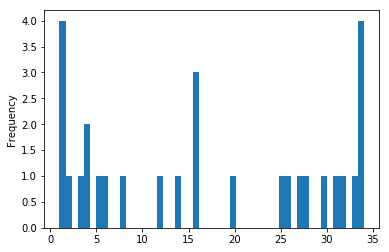

In [244]:
# Plot distribution of when the high occurred

max_time_in_day['Time Inc Counter'].plot(bins=50, kind='hist')

max_time_in_day['Time Inc Counter'].describe()

In [265]:
# Redo max time, slitting days when there was an increase in first hour vs days when it was not an increase

day_open = interval_15min_trimmed.loc[(interval_15min_trimmed['Time Inc Counter'] == 1)]

after_1_hour = interval_15min_trimmed.loc[(interval_15min_trimmed['Time Inc Counter'] == 5)]
after_1_hour.rename(columns={"close": "close after 1 hour"}, inplace=True)

day_close = interval_15min_trimmed.loc[(interval_15min_trimmed['Time Inc Counter'] == 34)]
day_close.rename(columns={"close": "close of day"}, inplace=True)

# Merge together
key_day_points = day_open[['Date','open']].merge(after_1_hour[['Date', 'close after 1 hour']], on='Date')
key_day_points = key_day_points.merge(day_close[['Date', 'close of day']], on='Date')

key_day_points['Change first hour'] = key_day_points['close after 1 hour'] / key_day_points['open']
key_day_points['Change over day'] = key_day_points['close of day'] / key_day_points['open']

key_day_points['Change first hour flag'] = np.where(key_day_points['Change first hour']>1, 'Inc', 'Dec')
key_day_points['Change over day flag'] = np.where(key_day_points['Change over day']>1, 'Inc', 'Dec')

key_day_points['Change day minus first hour'] = key_day_points['Change over day'] - key_day_points['Change first hour']


key_day_points.head()

/home/stuart/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,Date,open,close after 1 hour,close of day,Change first hour,Change over day,Change first hour flag,Change over day flag,Change day minus first hour
0,2018-08-29,7619.1802,7610.1699,7564.3501,0.998817,0.992804,Dec,Dec,-0.006014
1,2018-08-28,7578.7900,7630.6802,7626.2798,1.006847,1.006266,Inc,Inc,-0.000581
2,2018-08-24,7563.2202,7566.2202,7583.5000,1.000397,1.002681,Inc,Inc,0.002285
3,2018-08-23,7572.8701,7566.6899,7564.4399,0.999184,0.998887,Dec,Dec,-0.000297
4,2018-08-22,7565.4102,7563.8599,7580.0698,0.999795,1.001938,Dec,Inc,0.002143


In [258]:
# Check the correlation between change in first hour and change over day

pd.crosstab(key_day_points['Change first hour flag'], key_day_points['Change over day flag'],  normalize=False)

pd.crosstab(key_day_points['Change first hour flag'], key_day_points['Change over day flag'],  normalize=True)

Change over day flag,Dec,Inc
Change first hour flag,,
Dec,10,4
Inc,5,10


Change over day flag,Dec,Inc
Change first hour flag,,
Dec,0.344828,0.137931
Inc,0.172414,0.344828


In [260]:
# Merge first hour change flag back onto max time in day dataset
data_for_hists = max_time_in_day[['Date', 'Time String', 'Time Inc Counter', 'close']].\
        merge(key_day_points[['Date', 'Change first hour', 'Change first hour flag', 'Change over day', 'Change over day flag']], on='Date')

data_for_hists.head()

,Date,Time String,Time Inc Counter,close,Change first hour,Change first hour flag,Change over day,Change over day flag
0,2018-08-29,08:30:00,3,7631.6001,0.998817,Dec,0.992804,Dec
1,2018-08-28,08:45:00,4,7631.8101,1.006847,Inc,1.006266,Inc
2,2018-08-24,16:15:00,34,7583.5000,1.000397,Inc,1.002681,Inc
3,2018-08-23,09:45:00,8,7600.6899,0.999184,Dec,0.998887,Dec
4,2018-08-22,11:45:00,16,7598.0000,0.999795,Dec,1.001938,Inc


count    15.000000
mean     20.533333
std      12.199922
min       4.000000
25%       9.000000
50%      25.000000
75%      32.000000
max      34.000000
Name: Time Inc Counter, dtype: float64

count    14.000000
mean     13.571429
std      12.732238
min       1.000000
25%       1.250000
50%      12.000000
75%      25.250000
max      34.000000
Name: Time Inc Counter, dtype: float64

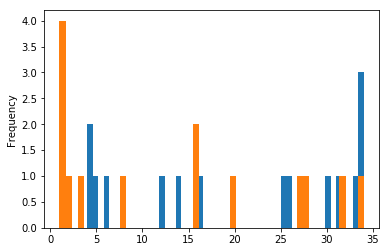

In [264]:
# Redo histogram

# Plot distribution of when the high occurred

data_for_hists[data_for_hists['Change first hour flag'] == 'Inc']['Time Inc Counter'].plot(bins=50, kind='hist')
data_for_hists[data_for_hists['Change first hour flag'] == 'Inc']['Time Inc Counter'].describe()


data_for_hists[data_for_hists['Change first hour flag'] == 'Dec']['Time Inc Counter'].plot(bins=50, kind='hist')
data_for_hists[data_for_hists['Change first hour flag'] == 'Dec']['Time Inc Counter'].describe()

## Scrap code

In [224]:
list(close_after_1_hour_per_day.columns.values)

['close']

In [227]:
print(close_after_1_hour_per_day.index.names)

['Date', 'Time Inc Counter']
